In [1]:
%matplotlib inline

import sys, os

sys.path.append(os.path.abspath(os.path.join('..', 'datasets/')))
from tools import *

#Attribute Information:
Features consist of hourly average ambient variables:
    
- Temperature (T) in the range 1.81°C and 37.11°C,

- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,

- Relative Humidity (RH) in the range 25.56% to 100.16%

- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg

- Net hourly electrical energy output (EP) 420.26-495.76 MW

In [2]:
df = pd.read_excel("../datasets/raw/power_plant/Folds5x2_pp.xlsx")

In [3]:
df = scale(df)[1]

In [4]:
df.head()

,AT,V,AP,RH,PE
0,0.372521,0.291815,0.771591,0.638204,463.26
1,0.662040,0.669039,0.671863,0.449330,444.37
2,0.093484,0.249822,0.476862,0.892493,488.56
3,0.539660,0.568683,0.429349,0.684718,446.48
4,0.255241,0.216014,0.404355,0.952547,473.90


In [5]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,0.505417,0.515050,0.504060,0.640067,454.365009
std,0.211118,0.226119,0.146963,0.195714,17.066995
min,0.000000,0.000000,0.000000,0.000000,420.260000
25%,0.331445,0.291459,0.401138,0.506267,439.750000
50%,0.525071,0.475445,0.496164,0.662399,451.550000
75%,0.677337,0.732740,0.603069,0.794504,468.430000
max,1.000000,1.000000,1.000000,1.000000,495.760000


Error whilst processing PE: cannot convert float NaN to integer


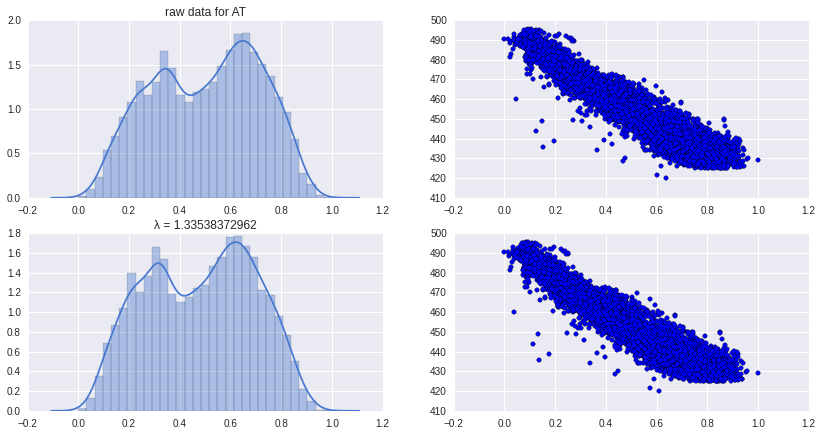

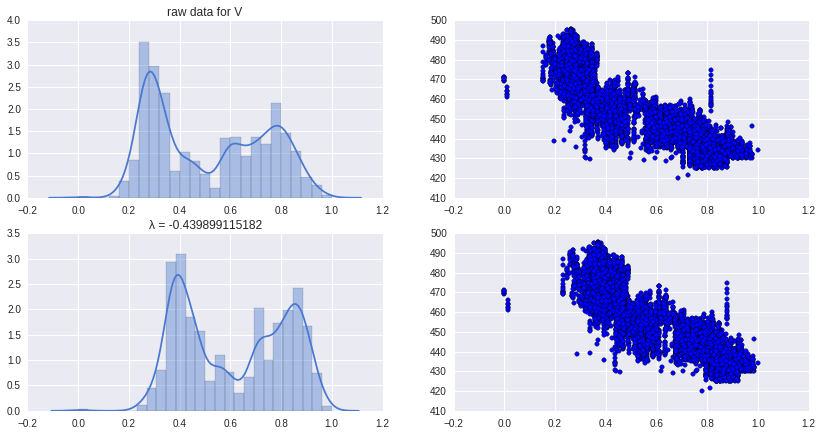

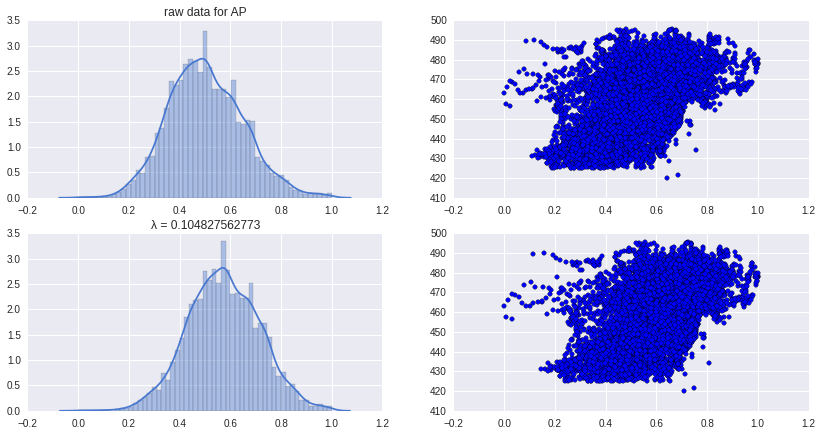

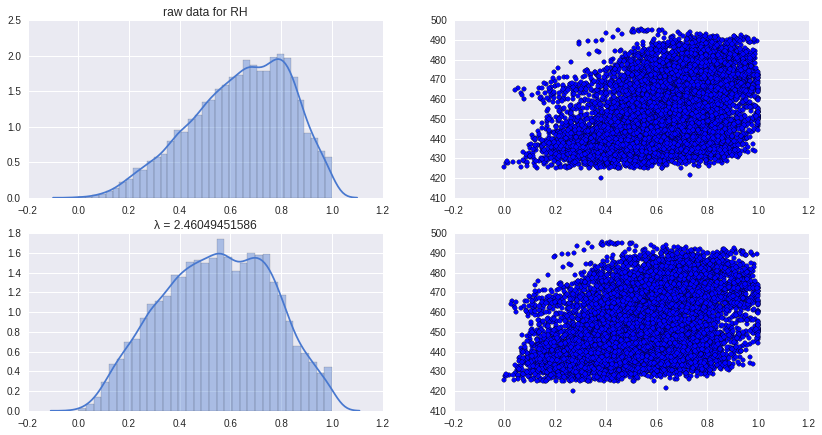

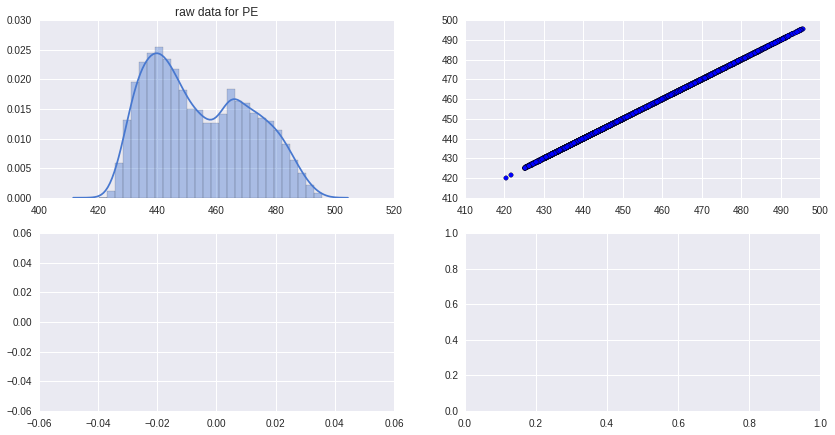

In [6]:
lambdas = plot_cox_df(df)

In [7]:
lambdas['AP'] = 0 #log-transform
lambdas

{'AP': 0,
 'AT': 1.3353837296219406,
 u'PE': 1,
 'RH': 2.4604945158589104,
 'V': -0.43989911518156471}

In [8]:
df = transform_cox(df, lambdas)

In [9]:
train, test = split(df)
X_train = np.array(train.ix[:,0:-1])
y_train = train.ix[:,-1]
X_test = np.array(test.ix[:,0:-1])
y_test = test.ix[:,-1]

In [ ]:
lambda_grid = np.logspace(0,-5, num=50)
grid_search = auto_grid_search_with_t(X_train, y_train, None, lambda_grid, level=5)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [24]:
best_estimator = grid_search.best_estimator_
#best_estimator.fit(X_train, y_train)

In [25]:
def get_r_squared(learner, X, y):
    mse = -learner.score(X,y)
    ss_reg = mse * y.size
    ss_tot = np.var(y) * y.size
    return 1 - ss_reg/ss_tot

In [26]:
get_r_squared(best_estimator, X_test, y_test)

0.9440894823239532

In [27]:
get_r_squared(best_estimator, X_train, y_train)

0.9668425651805655